# Epitope mapping workflow for M.bovis 
## EMIDA antigen mining project

### Reference:

**Computational selection and testing of novel antigenic targets in the Mycobacterium bovis proteome.** Damien Farrell, Gareth Evans, Chris Pirson, Kerri M Malone, Kevin Rue-Albrecht, Anthony J Chubb, H Martin Vordermeier, Stephen V. Gordon. Plos Computational Biology 2015.

We apply several binding prediction methods to the M. bovis proteome using a subset of human HLA alleles to approximate the bovine immune response. Two different strategies are then applied to filter the resulting set of binders: global binder ranking and epitope density. Several other metrics are applied to produce a final list of peptide candidates.

Contact:

Tuberculosis Molecular Microbiology group,  
School of Veterinary Medicine,  
University College Dublin,  
Dublin 4.  

### Requires:

Old version of mhcpredict library, needs to be updated.

pandas, matplotlib, seaborn

In [343]:
import os,sys
import re
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
home = os.path.expanduser('~')
sys.path.append(os.path.join(home,'python/sandbox/mhcpredict'))
import Base, Genome, Tepitope, EpitopePipeline
from matplotlib_venn import venn2,venn3
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 500)
import seaborn as sns
sns.set_style("ticks", {'axes.facecolor': '#F7F7F7','axes.grid': False,'legend.frameon':True, 'legend.fontsize':12})
sns.set_context("notebook", font_scale=1.4)
plt.rcParams['savefig.dpi']=120
#newer module version we use later on
from mhcpredict import base, analysis, sequtils

In [2]:
genome=Genome.genbank2Dataframe('MTB-H37Rv.gb', cds=True)
n=3
minsize=2
m='netmhciipan'
gname='MTB-H37Rv'
otherbinders = {}
otherbinders['iedbmhc1_9'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_9_3.csv')
otherbinders['iedbmhc1_11'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_11_3.csv')
otherbinders['tepitope'] = pd.read_csv('binders_MTB-H37Rv_tepitope_bovine_3.csv')
otherbinders['netmhciipan'] = pd.read_csv('binders_MTB-H37Rv_netmhciipan_bovine_3.csv')
mapping = pd.read_csv('mbovis_mapping_new.csv',usecols=[1,2,3,4])#,index_col=0)

In [3]:
l1='bovine'
l2='bovine_11'
l3='bovine_15'
file1 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l1,n)
file2 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l2,n)
file3 = 'binders_%s_%s_%s_%s.csv' %(gname,m,l3,n)
b1 = pd.read_csv(file1,index_col=0)
b2 = pd.read_csv(file2,index_col=0)
b3 = pd.read_csv(file3,index_col=0)

In [4]:
EpitopePipeline=reload(EpitopePipeline)
#cl1 = EpitopePipeline.findClusters(b1,m,minsize=minsize)
#n9 = EpitopePipeline.analyseClusters(cl1, genome, gname, m, otherbinders, l=9)
n9 = pd.read_csv('result_%s_%s_9.csv' %(gname,m))

In [11]:
print file1
cols=['locus_tag','R','binders','clustersize','start','end','peptide','RVL','mbname','identity']
print n9[cols][:5]
#print n9.drop_duplicates('peptide')[cols]
#print n9[n9.RVL<=0.35][cols]

binders_MTB-H37Rv_netmhciipan_bovine_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   RVL   mbname  identity
0    Rv1240  23.495        3           13     18   31  GQIGYSLLFRLASGSLLGPD  0.30   Mb1272     100.0
1   Rv1886c  19.799        2           10      6   16  MTDVSRKIRAWGRRLMIGTA  0.30  Mb1918c     100.0
2   Rv2995c  18.974        2           10     92  102  RFELDHHINLRPARLYPGVA  0.35  Mb3019c      99.7
3   Rv2185c  17.748        3           16     52   68  KRARMLMDAAIFKDTLIMSY  0.20  Mb2207c     100.0
4   Rv1886c  17.146        2           10    270  280  PAEFLENFVRSSNLKFQDAY  0.20  Mb1918c     100.0


In [10]:
EpitopePipeline=reload(EpitopePipeline)
#cl2 = EpitopePipeline.findClusters(b2,m,minsize=minsize)
#n11 = EpitopePipeline.analyseClusters(cl2, genome, gname, m, otherbinders, l=11)
n11 = pd.read_csv('result_%s_%s_11.csv' %(gname,m))

In [13]:
print file2
print n11[cols][:5]
#print n11.peptide.str.len()

binders_MTB-H37Rv_netmhciipan_bovine_11_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   RVL   mbname  identity
0   Rv2995c  18.974        2           12     91  103  RFELDHHINLRPARLYPGVA  0.35  Mb3019c      99.7
1    Rv1484  12.000        2           18     13   31  VSGIITDSSIAFHIARVAQE  0.15   Mb1520     100.0
2   Rv3161c  10.583        2           15    360  375  KEWPGMLAFYRNLAMALVGD  0.25  Mb3186c      99.7
3    Rv1827  10.000        2           12     85   97  RHPDSDIFLDDVTVSRRHAE  0.30   Mb1858     100.0
4    Rv3846   9.592        2           18    164  182  EHAFYLQYKNVKVDFAKAFW  0.15   Mb3876      99.5


In [15]:
#cl3 = EpitopePipeline.findClusters(b3,m,minsize=minsize)
#n15 = EpitopePipeline.analyseClusters(cl3, genome, gname, m,otherbinders, l=15)
n15 = pd.read_csv('result_%s_%s_15.csv' %(gname,m))

In [18]:
cols1=['locus_tag','R','binders','clustersize','start','end','peptide','mbname','identity']
print file3
print n15[cols1][:5]

binders_MTB-H37Rv_netmhciipan_bovine_15_3.csv
  locus_tag       R  binders  clustersize  start  end               peptide   mbname  identity
0   Rv2460c  20.298        2           16    128  144  ALPNARVLIHQPSLSGVIQG  Mb2487c       100
1    Rv2296  12.728        2           16     57   73  EPTWSYLYRTMIPPLSAAGH   Mb2318       100
2    Rv1594  10.583        2           16    298  314  DRASCKYMKMITPAALLRCL   Mb1620       100
3    Rv1296   9.165        2           18    246  264  AAMTASAEYLRLLRRHNVAA   Mb1328       100
4    Rv2715   9.000        3           17    140  157  VTKDVNIVFRLASLPMGSEA   Mb2734       100


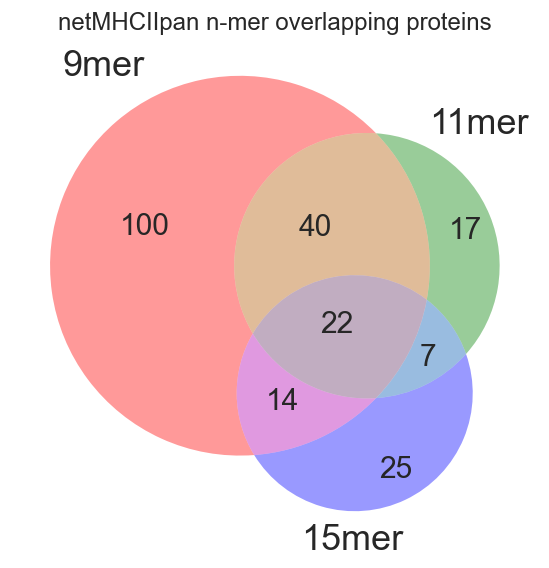

In [134]:
plt.rcParams['font.size']=18
venn3([set(n9.locus_tag),set(n11.locus_tag),set(n15.locus_tag)],set_labels=['9mer','11mer','15mer'])
plt.title('netMHCIIpan n-mer overlapping proteins')
#set(res1[:50].locus_tag) & set(res2[:50].locus_tag)

In [8]:
EpitopePipeline=reload(EpitopePipeline)
mt='tepitope'
file4 = 'binders_%s_%s_%s_%s.csv' %(gname,mt,l1,3)
b4 = pd.read_csv(file4,index_col=0)
#cl4 = EpitopePipeline.findClusters(b4,mt,minsize=minsize)
#t = EpitopePipeline.analyseClusters(cl4, genome, gname, mt,otherbinders)
t = pd.read_csv('result_%s_%s_9.csv' %(gname,mt))

In [21]:
#combine n11 and n15
nfinal = EpitopePipeline.combineResults(n15,n11)
both = t.merge(nfinal,on='locus_tag')
ovlps = both[abs(both.start_x-both.start_y)<4][['locus_tag','start_x','start_y','peptide_x','peptide_y']]
print len(t[t.locus_tag.isin(ovlps.locus_tag)]), 'overlaps'

#get rid of tepitope peptides that are also in netmhciipan results
tfinal = t[-t.locus_tag.isin(ovlps.locus_tag)].reset_index()
#tfinal=t
print 'final results: %s netmhciipan and %s tepitope' %(len(nfinal), len(tfinal))

fcols=['locus_tag','mbname','identity','R','binders','clustersize','start','end', 'peptide','peplength',
       'concentration','hydro','RVL','source','gene','order','product']
nfinal[fcols].to_csv('result_MTB-H37Rv_netmhciipan_final.csv')
tfinal[fcols].to_csv('result_MTB-H37Rv_tepitope_final.csv')

#venn3([set(t.locus_tag),set(n11.locus_tag),set(n15.locus_tag)],
#      set_labels=['tepitope','netMHCIIpan 11mer','netMHCIIpan 15mer'],alpha=0.6)
#plt.savefig('cluster_overlaps.png')


22 overlaps
final results: 131 netmhciipan and 102 tepitope


15712 9249 47370
93 72 124


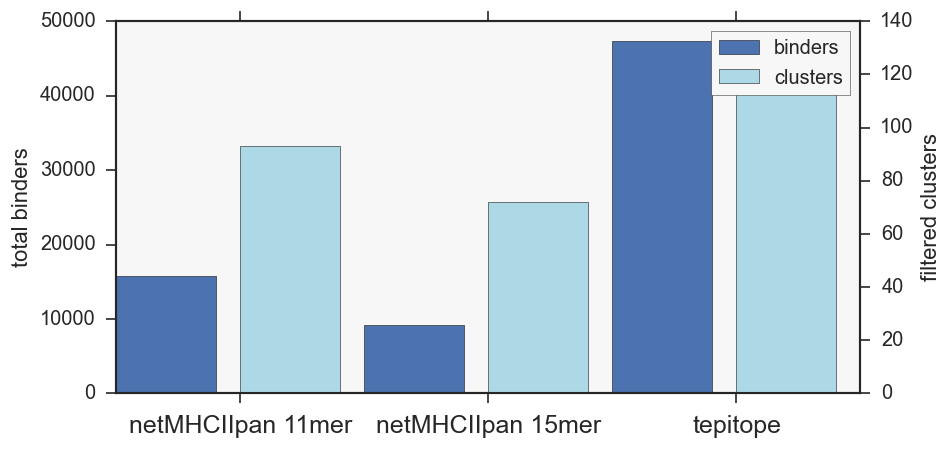

In [135]:
#summary of binders/clusters?
print len(b2),len(b3),len(b4)
print len(n11),len(n15),len(t)
f,ax=plt.subplots(1,1,figsize=(8,4))
ind=np.arange(0,3)
ln1=ax.bar(ind,[len(b2),len(b3),len(b4)],width=0.4)
ax1=plt.twinx(ax)
ln2=ax1.bar(ind+.5,[len(n11),len(n15),len(t)],width=0.4,color='lightblue')
names=['netMHCIIpan 11mer','netMHCIIpan 15mer','tepitope']
ax.set_xticks(ind+.5)
ax.set_xticklabels(names, minor=False, fontsize=15)
ax.set_ylabel('total binders')
ax1.set_ylabel('filtered clusters')
plt.legend([ln1,ln2],['binders','clusters'])

------top shared binder proteins------
read file binders_MTB-H37Rv_tepitope_bovine_3.csv
read file binders_MTB-H37Rv_netmhciipan_bovine_3.csv
8834 shared binders found
239 proteins with top shared binders
39 known antigens in results
overlaps for iedbmhc1_11
222 with overlapping binders
454 peptide candidates in 237 proteins after peptide filtering
   locus_tag   mbname               peptide  start  end  rank
0     Rv0700   Mb0720  KTVDALMRIDLPASVDVNIQ     81  101    59
1     Rv0700   Mb0720  TEKNVYCVIRSPHKYKDSRE     43   63    59
2     Rv2803   Mb2826  DEAAPELVRLARRKSRIPPH    135  155    64
3     Rv2803   Mb2826  GQSLSGFVLSAAVDHAHDLL     92  112    64
4    Rv2185c  Mb2207c  YPKRARMLMDAAIFKDTLIM     47   67   104
5    Rv2185c  Mb2207c  MLMDAAIFKDTLIMSYEWPE     53   73   104
6    Rv2185c  Mb2207c  VDLAVPMIGMLKRKAERRLI    111  131   104
7    Rv0580c  Mb0595c  TAMRGELIRDRAVVSELFLR     94  114   107
8    Rv0580c  Mb0595c  HPPAALLRLVNPILRSLLHT     11   31   107
9     Rv3676   Mb3700  PGDRLY

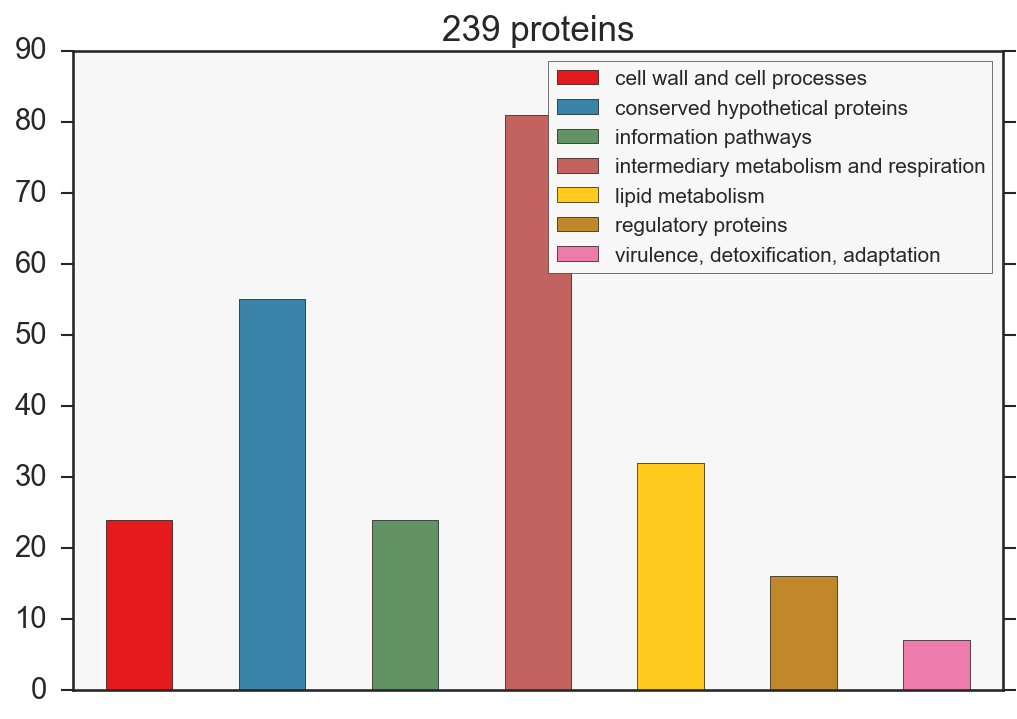

In [29]:
#get top shared binders
n=3
others={}
others['iedbmhc1_11'] = pd.read_csv('binders_MTB-H37Rv_iedbmhc1_11_3.csv')
EpitopePipeline=reload(EpitopePipeline)
shared = EpitopePipeline.getProteinswithSharedBinders(gname, l1, genome, n=n, otherbinders=others)
scols = ['locus_tag','mbname','peptide','start','end','rank']
print shared[:20][scols]
print len(shared)

In [30]:
#remove all sharedbinders we have already found in cluster methods!
sh1 = shared.merge(nfinal,on='locus_tag')
sh2 = shared.merge(tfinal,on='locus_tag')
sh = pd.concat([sh1,sh2])
ovlps2 = sh[abs(sh.start_x-sh.start_y)<10][['locus_tag','start_x','start_y','peptide_x','peptide_y']]
#print ovlps2
sharedfinal = shared[-shared.locus_tag.isin(ovlps2.locus_tag)].reset_index()
scols=['locus_tag','mbname','peptide','peplength','start','end','rank','concentration','hydro','source']
sharedfinal[scols].to_csv('topsharedbinders_final.csv')
print '%s/%s shared binders overlap with clusters' %(len(ovlps2),len(sharedfinal))


42/354 shared binders overlap with clusters


mtb_peptides 0.41 0.26
iedb_myco_tcell 0.41 0.22
result_MTB-H37Rv_tepitope_9 0.43 0.28
result_MTB-H37Rv_netmhciipan_9 0.42 0.28
topsharedbinders_MTB-H37Rv 0.41 0.3


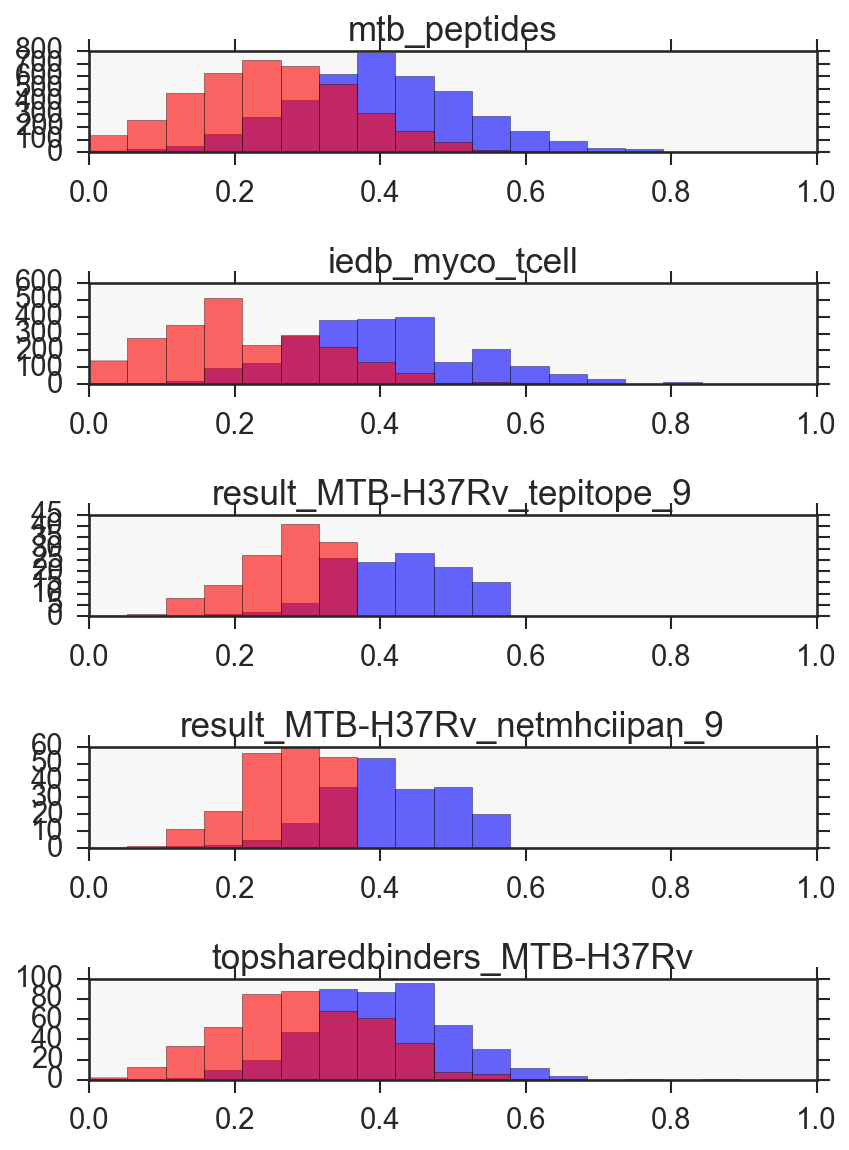

In [31]:
EpitopePipeline=reload(EpitopePipeline)
EpitopePipeline.analysePeptideAAContent()
#EpitopePipeline.analyseAminoAcids()

In [5]:
#reload final lists from files to avoid recalculation
final1 = pd.read_csv('result_MTB-H37Rv_netmhciipan_final.csv',index_col=0)
final2 = pd.read_csv('result_MTB-H37Rv_tepitope_final.csv',index_col=0)
final3 = pd.read_csv('topsharedbinders_final.csv',index_col=0)

In [10]:
#srm data
srm = pd.read_csv('srm_mtb.csv')
srm = genome.merge(srm[['locus_tag','concentration']],on='locus_tag',how='inner')
srm = srm[srm.concentration>0]
print len(srm)
#srm = srm[srm.length<=400]
#print len(srm)

1870


In [6]:
#get final lists, randomise and save to excel sheets
n=96
lcols=['locus_tag','mbname','peptide'] #cols for excel file
f1 = final1[:n]
f1['method']='cl_tepitopepan'
f2 = final2[:n]
f2['method']='cl_netmhciipan'
f3 = final3[:n]
f3['method']='topsharedbinders'

plist = pd.concat([f1,f2,f3]).reset_index(drop=True)

#randomized list
np.random.seed(seed=8) #nb use same seed 
plist = plist.reindex(np.random.permutation(plist.index))
plist.to_csv('peptide_lists.csv') 

writer = pd.ExcelWriter('peptide_lists.xls')
chunks = np.array_split(plist.index, 3)
i=1
for c in chunks:
    plist.ix[c][lcols].to_excel(writer,'list'+str(i))
    i+=1
#also save by method for easy reference    
for i,g in plist.groupby('method'):
    g.sort()[lcols].to_excel(writer,'method'+str(i))
writer.save()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

### get negative lists for benchmarking - the 'baseline' method:

27155 47370
20    95
dtype: int64
95 95
            id               peptide
69  Mb2635c_69  LFSRKGVVTLEKNGLTEDDV
85   Mb1266_85  SGAWLGLFIGLVLGFFSPNP
12   Mb1687_12  TDLAEWLVRQGVPFRSAHEA
83  Mb1482c_83  FRRAPHLPFDATMTDELGTN
87   Mb0358_87  ARNGEVLVGQPAKNQAVTNV
90   Mb0069_90  VSNTEVVRNMPRPLVAVAAI
62  Mb3835c_62  GPMRLEYVALALAMVLSLLG
21   Mb2917_21  MTVASTAHHTRRLRFGLAAP
64  Mb3072c_64  VPGPDRVALLSLLRSTPLTE
51   Mb1444_51  KPPVGAVIVDPNGRIVGAGG
66   Mb3507_66  KKTPSLLYGDERIFAALAKR
37   Mb1655_37  LFDDLEFRVLRDRLFDTLAA
93  Mb3831c_93  MAYHNPFIVNGKIRFPANTN
48   Mb0687_48  SIHDKHIEVIVRQMLRRVTI
6     Mb1707_6  IAGHIDIAWNTNLAYVRTVL
2    Mb0272c_2  QVAEGYLRIAVANMANAVKK
28  Mb2183c_28  LMRRAGGLVFARKVRAEHRP
56   Mb2935_56  LDLNSTVVADVADTQAECNC
1     Mb3808_1  WWLFEALRHPVRSRLADLLT
47  Mb2074c_47  DRAALAKVIADIPVQHPLSG


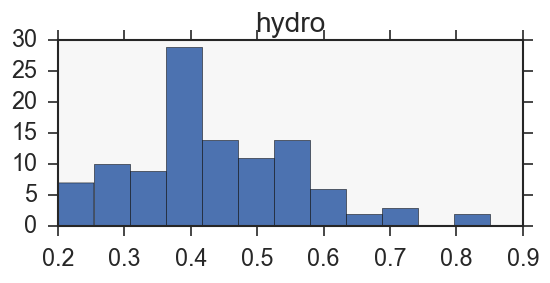

In [11]:
def getRandomNeg(b):
    np.random.seed(seed=8)
    br = b.reset_index(drop=True)
    bneg = br.ix[np.random.choice(br.index, 100)]    
    #use only single binders (no neighbours)?
    return bneg

#take lowest scoring?
#bneg = br1[-290:]
#take random ?

print len(b1), len(b4)
bn1 = getRandomNeg(b1)
bn4 = getRandomNeg(b4)
bneg = pd.concat([bn1,bn4])
#remove zero abundance data using srm data
bneg = bneg[bneg.name.isin(srm.locus_tag)]

def getpeptide(b, genome):
    #add fix for short peptides...
    b = bneg.merge(genome[['locus_tag','length','translation']],
                                left_on='name',right_on='locus_tag')

    b['start'] = b.apply(lambda x: x.pos-6 if x.pos>6 else 0,axis=1)
    b['end'] = b.apply(lambda x: x.pos+14 if x.pos>6 else 20,axis=1)
    b['peptide'] = b.apply(lambda x: x.translation[int(x.start):int(x.end)],axis=1)
    return b

bneg = getpeptide(bneg, genome)
bneg['hydro'] = bneg.apply(EpitopePipeline.getAAFraction,axis=1)
bneg['RVL'] = bneg.apply(lambda x: EpitopePipeline.getAAFraction(x,aas=['R','V','L']),axis=1)

mapping = pd.read_csv('mbovis_mapping_new.csv',usecols=[1,2,3,4])
bneg = bneg.merge(mapping,left_on='locus_tag',right_on='tbname',how='inner')
#remove <20mers
bneg = bneg[bneg.peptide.str.len()==20]
#filter hydro?
#bneg = bneg[bneg.hydro<=0.6]
bneg.hist('hydro',bins=12,figsize=(5,2),grid=False)

#remove any overlapping in positives!
#print bneg[bneg.columns[3:10]].merge(plist[['locus_tag','peptide']],on='locus_tag',how='inner')
bneg = bneg[-bneg.locus_tag.isin(plist.locus_tag)]
bneg = bneg.drop_duplicates('peptide')

bneg = bneg.reset_index()
bneg = bneg.reindex(np.random.permutation(bneg.index))
bneg.index = bneg.index+1
ind = bneg.index.astype(str)
bneg['id'] = bneg.mbname+'_'+ind

bneg.to_csv('negatives_list.csv',index=False)
writer = pd.ExcelWriter('negatives_list.xls')
lcols=['id','peptide']
print bneg.peptide.str.len().value_counts()
print len(bneg), len(bneg.peptide.unique())
print bneg[lcols][:20]
bneg[lcols].to_excel(writer,'negatives list')
writer.save()

In [335]:
def responsesbreakdown(res, key='#pos',label=''):
    s = res.groupby([key,'method']).agg({'id':np.size})
    s = s.unstack('method')
    s.columns = s.columns.get_level_values(1)
    #print s
    perc = s.sum(1)

    f,ax=plt.subplots(1,2,figsize=(10,5))
    grid=ax.flat
    perc.plot(kind='pie',ax=grid[0],cmap='Spectral',figsize=(9.5,5),startangle=0)
    grid[0].set_title('%s (all methods)' %label,fontsize=18)
    s.plot(kind='barh', grid=False,ax=grid[1])
    grid[1].set_title('%s per method' %label,fontsize=20)
    grid[1].set_ylabel('')
    plt.tight_layout()
    plt.savefig('responses_bymethod.png')
    t=s.T
    t=t.fillna(0)  
    #print t
    #print t[t.columns[t.columns>=1]].sum(1)
    print t.sum()
    en = t[t.columns[t.columns>=1]].sum(1)/t.sum(1)
    return t

def hydroplot(res, key):
    res.boxplot('hydro',by=key,vert=False,grid=False)
    plt.title('peptide hydrophobicity by response')
    plt.suptitle('')
    plt.xlabel('hydrophobicity'); plt.ylabel('#pos')
    plt.tight_layout()
    plt.savefig('responses_hydrophobicity.png')

### VLA whole blood results:

#pos
0    171
1     26
2     37
3     24
4     24
dtype: float64


#pos,0,1,2,3,4,%pos
method,,,,,,
_pos ctrls,0,0,3,3,6,100.000000
cl_netmhciipan,52,12,12,4,8,27.272727
cl_tepitopepan,52,6,17,8,5,34.090909
topsharedbinders,67,8,5,9,5,20.212766


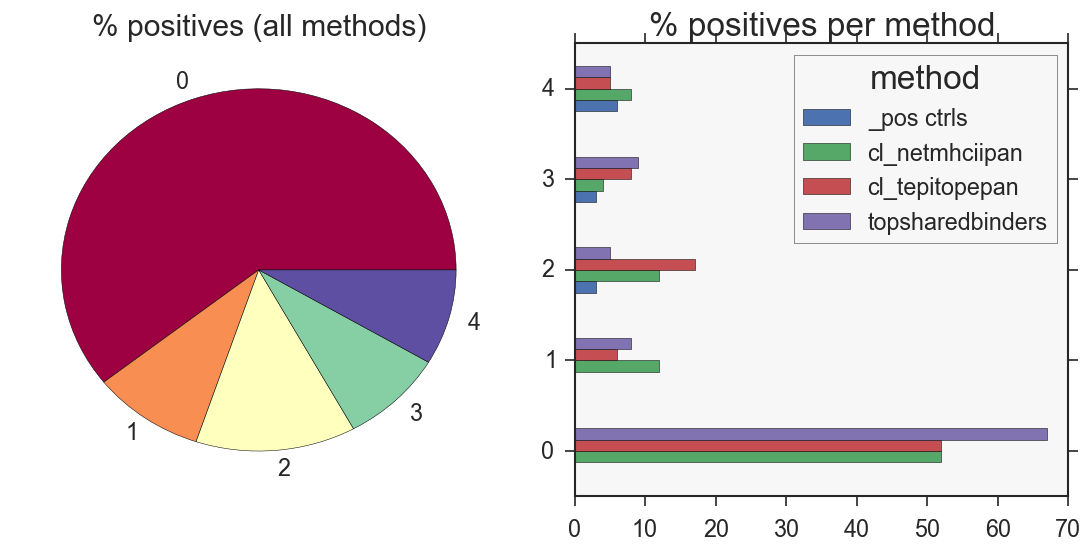

In [376]:
EpitopePipeline=reload(EpitopePipeline)
plt.rcParams['font.size']=20
sns.set_style("ticks", {'axes.facecolor': '#F7F7F7','legend.frameon': True})

#reload peptide list
plist = pd.read_csv('peptide_lists.csv',index_col=0)
#whole blood
wb = pd.read_csv('vla_wholeblood_results.csv')

tags = wb.tag.apply( lambda x: pd.Series(x.split('_')))
wb['mbname'] = tags[0]
wb['id'] = tags[1].astype(int)

#merge them
wb = plist.merge(vla,left_index=True,right_on='id',how='right')
wb.ix[wb.method.isnull(), 'method'] = '_pos ctrls'
#wb['both'] = wb.peptide.isin(ovlps.peptide_y)

s=responsesbreakdown(wb, label='% positives')
s['%pos'] = s[s.columns[-3:]].sum(1)/s.sum(1)*100
s

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


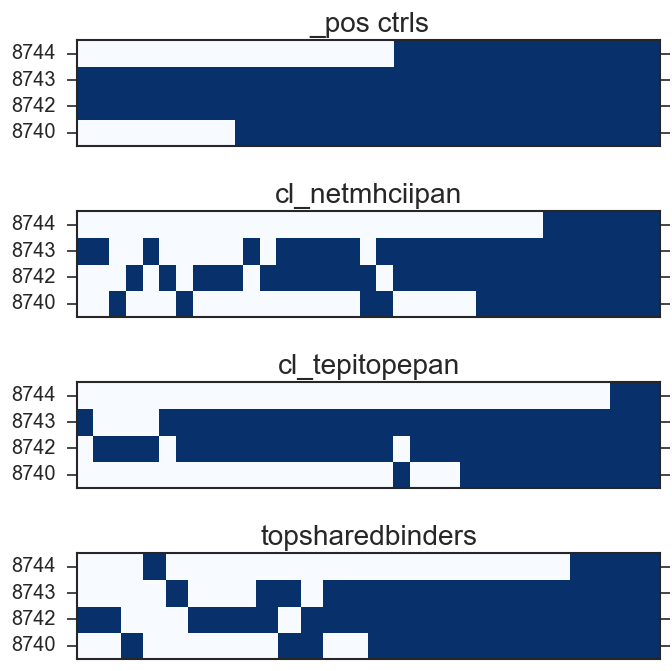

In [364]:
def responsesheatmap(res, cols, labels=None):
    """heatmap of responses by method"""
    
    fig,axs = plt.subplots(4,1,figsize=(6,6))
    grid=axs.flatten()
    i=0
    for n,g in res.groupby('method'):
        g['mean'] = g[cols].mean(1)        
        x = g.sort('mean')[cols]        
        x = x.loc[(x>0).any(1)]
        ax=grid[i]
        hm = ax.pcolor(x.T,cmap='Blues')
        ax.set_yticks(np.arange(0.5, len(x.columns)))
        if labels == None:
            names = cols
        else:
            names = labels
        ax.set_yticklabels(names, minor=False, fontsize=12)
        #ax.set_yticks(np.arange(0.5, len(x.index)))
        ax.set_xticks([])
        ax.set_xticklabels('')
        ax.set_xlim(0, len(x.index)-1)
        ax.set_title(n)
        #hm.set_clim(-3.14,1.33)
        i+=1
        
    #cb=fig.colorbar(hm, ax=axs[0],orientation='horizontal', aspect=5)
    #plt.setp(cb.ax.get_xticklabels(), rotation='vertical', fontsize=10)
    plt.tight_layout()
    plt.savefig('responses_heatmap.png')

x = wb.copy()
x = x.replace({'-': 0, 'positive': 1})
responsesheatmap(x, cols=['8740','8742','8743','8744'])

### VLA pbmc results:

In [378]:
#pbmc data already has wb positives column in it
pbmc = pd.read_csv('vla_pbmc_results.csv')
x = pbmc[pcols]
#derive positive rates for each peptide using gareth method of nil mean+3SD+0.1 cutoff
#nil wells for cutoffs
nil = pd.read_csv('vla_pbmc_nil.csv')
cut = nil.mean()+nil.std()*3+0.1
pbmc['#pbmcpos'] = x[x>cut].count(1)

pbmc['mean'] = pbmc[pcols].mean(1)

pbmc['#wbpos'] = pbmc['#wbpos']/4*100
pbmc['#pbmcpos'] = pbmc['#pbmcpos']/7*100
pbmc['#pbmcpos'] = pbmc['#pbmcpos'].astype(int)

#get the mean fraction of both positive counts
pbmc['score'] = (pbmc['#pbmcpos']+pbmc['#wbpos'])/2.0
pbmc['score'] = pbmc.score.round(0)

tags = pbmc.tag.apply( lambda x: pd.Series(x.split('_')))
pbmc['mbname'] = tags[0]
pbmc['id'] = tags[1].astype(int)

#merge with peptide list
res = plist.merge(pbmc,left_index=True,right_on='id',how='right')
res.ix[res.method.isnull(), 'method'] = '_pos ctrls'
print res.groupby('method').agg({'id':np.size})

#r = res[res.method!='_pos ctrls']
#responsesbreakdown(r, key='#pbmcpos', label='% positives')
final = res.copy()

                  id
method              
_pos ctrls        12
cl_netmhciipan    88
cl_tepitopepan    88
topsharedbinders  94


### pbmc responses breakdown

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


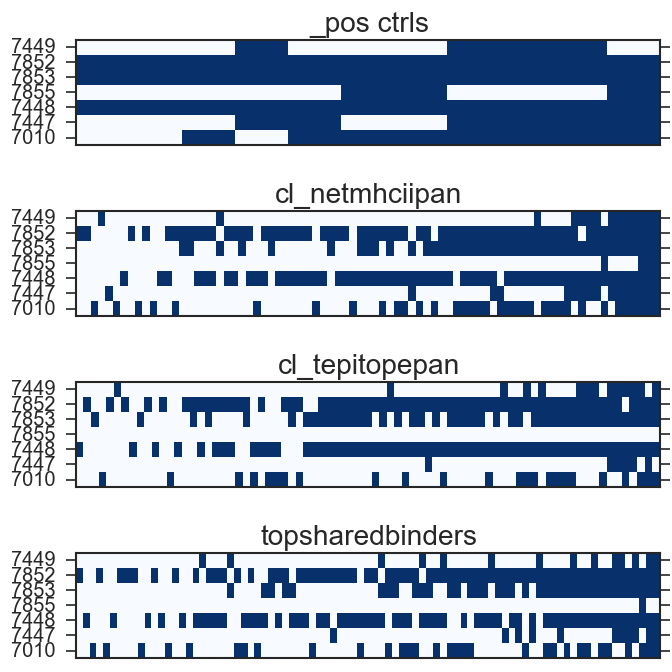

In [379]:
x = res[pcols].clip_lower(0.1).replace(0.1,0)
x = x[pcols].clip_upper(0.1).replace(0.1,1)
x['method'] = res.method
responsesheatmap(x, cols=pcols)

### Combine/compare whole blood IGRA in 4 animals with PBMCs in 7 animals for 270 peptides:

   #wbpos  #pbmcpos
0       0         0
1      25         0
2      50         0
3      75        14
4     100        28


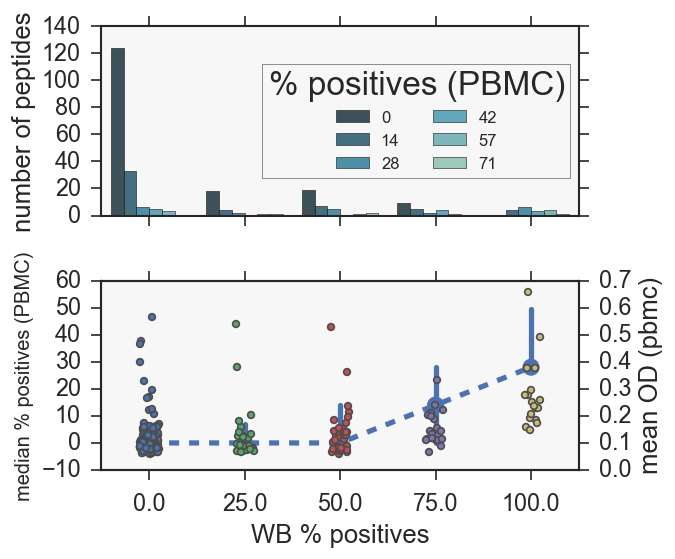

In [381]:
#plot pbmc responses
pbmc = pbmc.sort('#pbmcpos')
pbmc = pbmc.dropna(subset=['pep_no'])

#fig,ax = plt.subplots(1,1,figsize=(5,5))
#pbmc.plot('mean','wbmean',kind='scatter',ax=ax)

fig,axs = plt.subplots(2,1,figsize=(6,5))
grid=axs.flat
ax=grid[0]
sns.countplot(x='#wbpos', hue='#pbmcpos', data=pbmc, ax=ax, palette='GnBu_d')
ax.legend(loc=5, ncol=2, fontsize=10, title='% positives (PBMC)')
ax.set_ylabel('number of peptides')
#sns.violinplot(x='#bloodpos', y='meanOD', data=pbmc.sort('#bloodpos'), ax=ax)
ax.set_title('')
ax.set_xlabel('')
ax.set_xticklabels('')

ax2=grid[1]
sns.pointplot('#wbpos', '#pbmcpos', data=pbmc.sort('#wbpos'), estimator=np.median, 
              ax=ax2, linestyles=["--"])
ax2.set_ylabel('median % positives (PBMC)',fontsize=12)
ax2.set_xlabel('WB % positives')
ax2=ax2.twinx()
sns.stripplot(x="#wbpos", y="mean", data=pbmc.sort('#wbpos'), 
                size=4, jitter=True, edgecolor="gray", ax=ax2)
ax2.set_ylabel('mean OD (pbmc)')
plt.tight_layout()
fig.savefig('responses_pbmcvsblood.png')

a = pbmc.groupby('#wbpos').agg({'#pbmcpos':np.median}).reset_index()
print a
#ctrls = res[res.method=='_pos ctrls']
#print ctrls[['tag','#wbpos','#pbmcpos','score']]

### pbmc results for baseline/control set

In [382]:
pbmcbl = pd.read_csv('vla_pbmc_baseline.csv')
pcols = ['7010','7447','7448','7855','7853','7852','7449']
x = pbmcbl[pcols]
#nil wells for cutoffs
nil = pd.read_csv('vla_pbmc_nil_baseline.csv')
cut = nil.mean()+nil.std()*3+0.1
pbmcbl['#pbmcpos'] = x[x>cut].count(1)

pbmcbl['#pbmcpos'] = pbmcbl['#pbmcpos']/7*100
pbmcbl['#pbmcpos'] = pbmcbl['#pbmcpos'].astype(int)

pbmcbl['method'] = 'baseline'

method
_pos ctrls          12
baseline            94
cl_netmhciipan      88
cl_tepitopepan      88
topsharedbinders    94
dtype: int64
#pbmcpos
0     231
14     84
28     23
42     12
57     10
71      4
dtype: float64


,0_x,1,2,3,4,%pos_x,0_y,14,28,42,57,71,%pos_y
method,,,,,,,,,,,,,
baseline,-,-,-,-,-,-,61,31,2,0,0,0,-
cl_netmhciipan,52,12,12,4,8,27.27273,51,16,9,4,4,4,18.21767
cl_tepitopepan,52,6,17,8,5,34.09091,57,16,7,4,4,0,12.28593
topsharedbinders,67,8,5,9,5,20.21277,62,21,5,4,2,0,9.631148


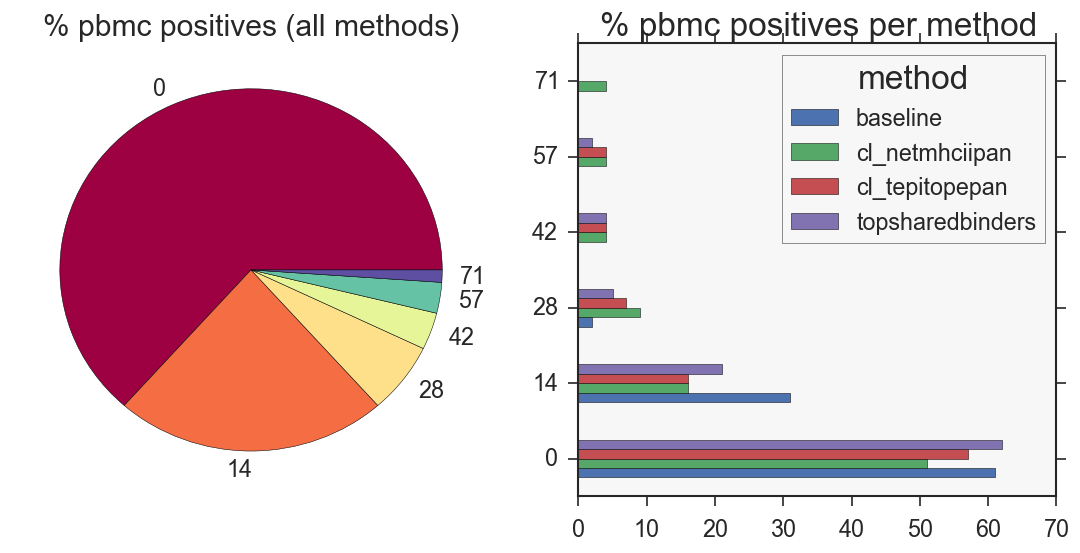

In [390]:
comb = pd.concat([final,pbmcbl])
print comb.groupby('method').size()
comb = comb[comb.method!='_pos ctrls']
s2=responsesbreakdown(comb, key='#pbmcpos', label='% pbmc positives')
s2['%pos'] = s2[s2.columns[-4:]].sum(1)/s.sum(1)*100
s2
s.merge(s2,left_index=1,right_index=1,how='right').fillna('-')

### final breakdown of combined responses

confidence
neg     181
low      33
med      41
high     15
dtype: int64


confidence,neg,low,med,high,%pos
method,,,,,
cl_netmhciipan,56,10,16,6,27.760252
cl_tepitopepan,55,15,12,6,27.029039
topsharedbinders,70,8,13,3,21.013413


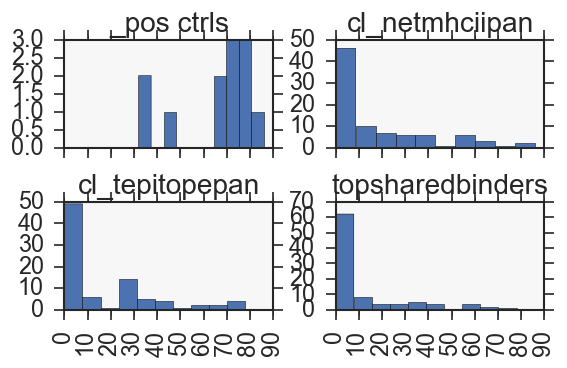

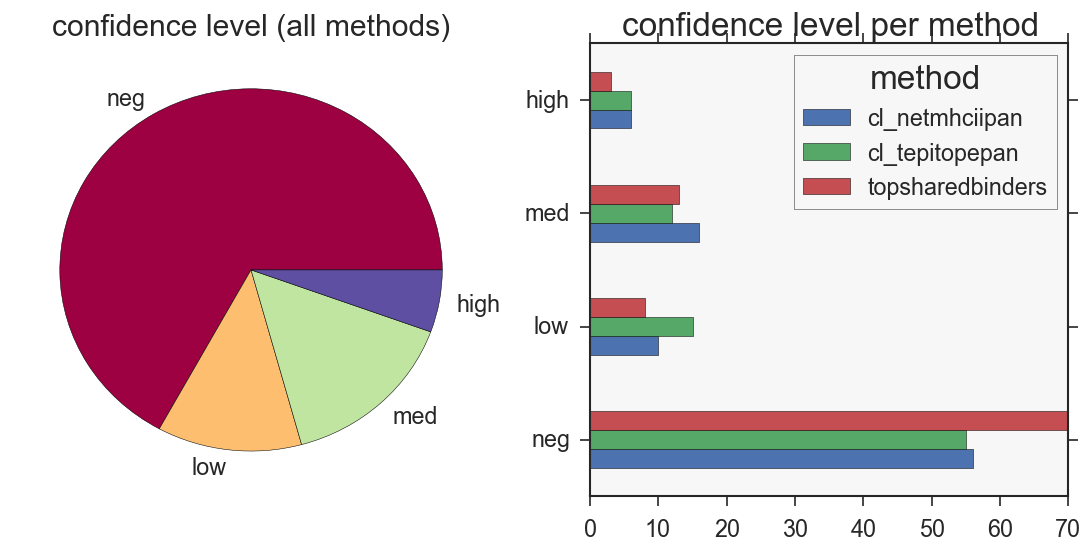

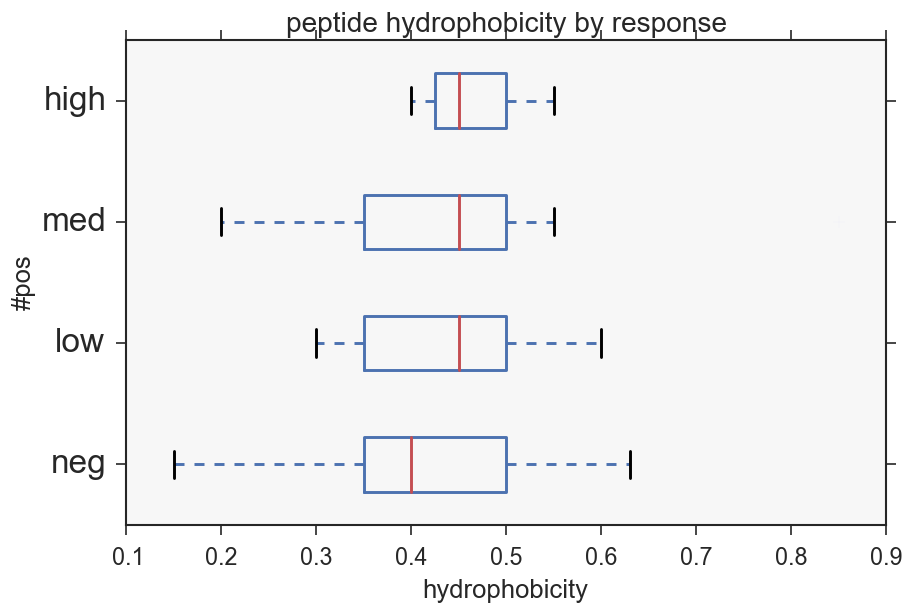

In [392]:
#calculate final confidence levels by binning score based on positive controls
pc = res[res.method=='_pos ctrls']
#print pc[['#wbpos','#pbmcpos','score']]
res.hist('score',by='method',stacked=True,sharex=1,figsize=(5,3))

final = final[final.method!='_pos ctrls']
bins = [0,15,30,60,100]
final['confidence'] = pd.cut(final.score, bins=bins, precision=0, include_lowest=True,
                             labels=['neg','low','med','high'])#,'very high'])

s3 = responsesbreakdown(final, key='confidence', label='confidence level') 
s3['%pos'] = s3[s3.columns[-3:]].sum(1)/s.sum(1)*100
hydroplot(final, key='confidence')
s3

In [328]:
#top peptides (high confidence) and their protein info
cols = ['locus_tag','mbname_x','peptide','method','score','#wbpos','#pbmcpos','start']

#top = final[(final['#pbmcpos']>=42) & (final['#wbpos']>=50)]
top = final[final.confidence.isin(['high','med'])]
top = top[top.method != '_pos ctrls']

#overlap of our final sets with known antigens
EpitopePipeline=reload(EpitopePipeline)
antigens = EpitopePipeline.getAntigenDatasets()
antigens['source'] = antigens.source.apply(lambda r: ';'.join(r))
top = antigens.merge(top[cols],on='locus_tag',how='right')

annot = EpitopePipeline.combineAnnotationData()
#kruh = pd.read_csv('Kruh_proteome_30d.csv')
#print top[top.locus_tag.isin(kruh.locus_tag)]
#add annotations
top = top.merge(annot[['locus_tag','gene','length','product_patric']],on='locus_tag',how='left')
top = top.sort(['score','locus_tag'],ascending=[False,True]).fillna('')
top = top.reset_index(drop=True)
top.to_csv('top_peptides.csv',index=False)
#print top
print top[top.source!='']

toppos = top.groupby('locus_tag').agg({'peptide':np.size}).sort('peptide',ascending=False)
#print 'proteins with most positives:'
#print toppos[:15]
#res = res.dropna(subset=['locus_tag'])
#print res[100:102]

tsp = final.groupby('locus_tag').agg({'method':base.first,'R':np.size})
tsp = tsp.rename(columns={'R':'prots'})
#print 'predicted top shared proteins:'
#print tsp.sort('prots',ascending=False)[:30]

#print top[top.method=='topsharedbinders'][['locus_tag','product_patric']]
print final[final.locus_tag=='Rv1238'][cols]
x = tsp.merge(toppos,left_index=True,right_index=True)
#x[x.prots>1].sort(['method','prots'],ascending=False)

#clusters correlation with positives and no. binders..?

#tsb correlation with binders in each epitope R?..

   locus_tag                                         source mbname_x               peptide            method  score  \
2    Rv2140c                                        zvi2008  Mb2164c  PGGALTLVNDAGMRRYVGAA  topsharedbinders     78   
3    Rv3671c                                      jones2010  Mb3695c  NEAAPTWLKTVPKRLSALLN    cl_tepitopepan     78   
7    Rv1833c                                         li2010  Mb1864c  VMSSPPVQYAILRRNFFVER    cl_tepitopepan     71   
15   Rv1239c                                         li2010  Mb1271c  PTVIGGMVLICLFLYHVFRN    cl_netmhciipan     60   
22    Rv2429                                        zvi2008   Mb2455  HAALGAAAIMGMNNVFYRGR    cl_netmhciipan     57   
29    Rv1489                                     santos2013   Mb1525  TAMLTLYFILAVGAHVRVRD  topsharedbinders     44   
36    Rv3071                                         li2010   Mb3098  FQLVRRVPVTTIIVDTPQAI    cl_netmhciipan     39   
50    Rv1594                                    

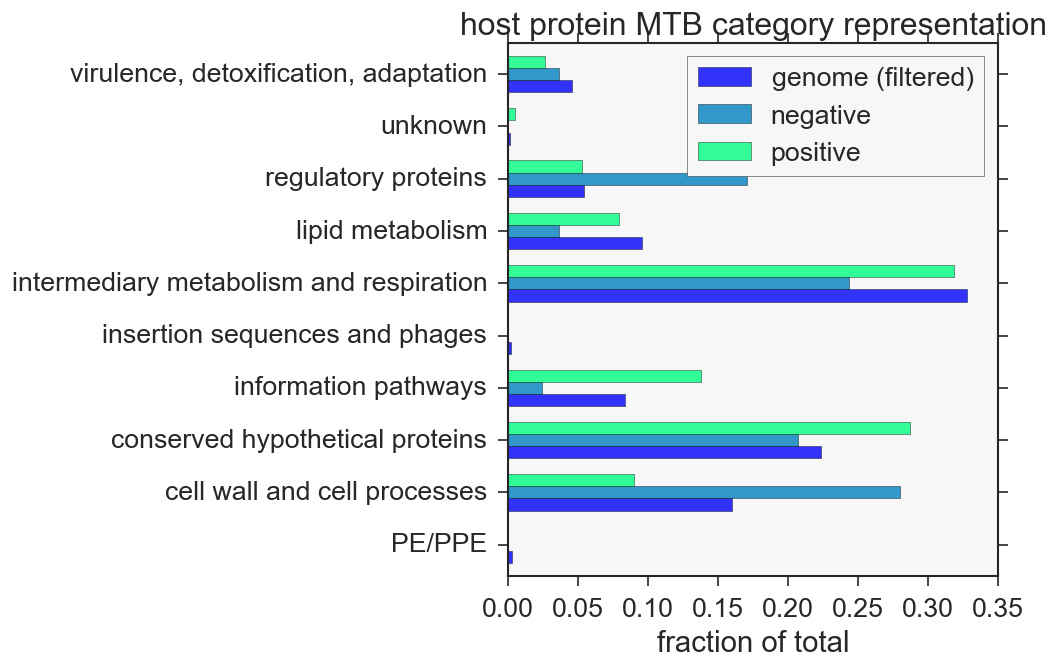

In [329]:
#cg = EpitopePipeline.getCategories(genome,plot=False)
cg = EpitopePipeline.getCategories(srm,plot=False)
cneg=EpitopePipeline.getCategories(res[-res.locus_tag.isin(top.locus_tag)],plot=False)
cpos=EpitopePipeline.getCategories(res[res.locus_tag.isin(top.locus_tag)],plot=False)
cats = pd.concat([cg,cpos,cneg],axis=1)
cats = cats/cats.sum()
cats.columns=(['genome (filtered)','negative','positive'])
ax=cats.plot(kind='barh',cmap='winter',alpha=0.8,width=.7,grid=False,figsize=(9,6))
plt.xlabel('fraction of total')
ax.set_title('host protein MTB category representation')
plt.tight_layout()
plt.savefig('vlaresults_cats.png')

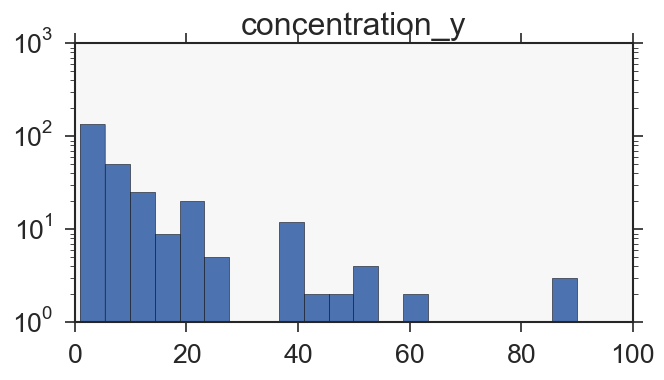

In [330]:
#srm concentrations of positives?
c = final.merge(srm, on='locus_tag')
f,ax=plt.subplots(1,1,figsize=(6,3))
c.hist('concentration_y',bins=20,ax=ax,grid=False)
ax.set_yscale('log')
#print c[c['concentration_y']>10][['locus_tag','concentration_y','score','product_y']]

### distributions of BoLA alleles

**references:**

* A. B. Dietz, N. D. Cohen, L. Timms, and M. E. Kehrli, “Bovine lymphocyte antigen class II alleles as risk factors for high somatic cell counts in milk of lactating dairy cows.,” J. Dairy Sci., vol. 80, no. 2, pp. 406–412, 1997.
* J. Oprządek, P. Urtnowski, G. Sender, A. Pawlik, and M. Łukaszewicz, “Frequency of BoLA-DRB3 alleles in Polish Holstein-Friesian cattle,” Anim. Sci. Pap. Reports, vol. 30, no. 2, pp. 91–101, 2012.
* R. Baxter, N. Hastings, a. Law, and E. J. Glass, “A rapid and robust sequence-based genotyping method for BoLA-DRB3 alleles in large numbers of heterozygous cattle,” Anim. Genet., vol. 39, no. 5, pp. 561–563, 2008.

name,baxter,dietz,oprzadek
index,,,
*24,-,0.1429,0.207
*08,-,0.141,0.137
*22,-,0.1429,0.1239
*27,0.2,0.0369,-
*11,0.16,0.0851,0.031
*16,0.1,0.1001,0.0752
*23,-,0.091,0.0819
*06,0.06,-,-
*09,0.06,-,-


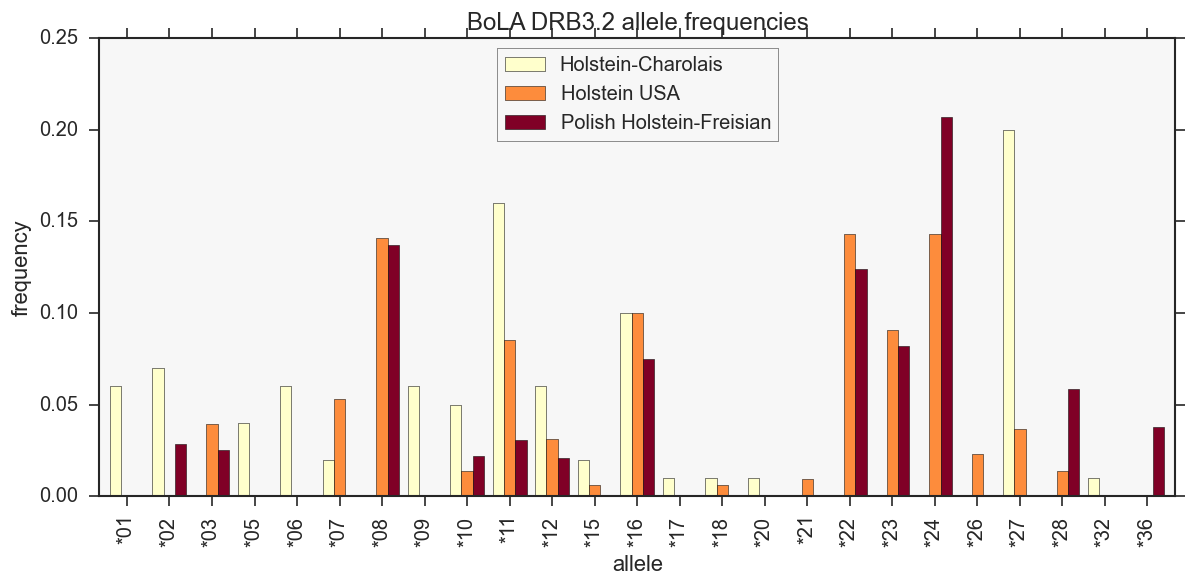

In [131]:
#bola alleles plots
bd = pd.read_csv('bola_alleles_dietz.csv')
bd=bd.set_index('allele').sort('freq',ascending=False)
bd['name'] = 'dietz'

bo = pd.read_csv('bola_alleles_oprzadek.csv')
bo = bo.groupby('allele_short').agg({'freq':np.max})
bo=bo.sort('freq',ascending=False)
bo['name'] = 'oprzadek'

bx = pd.read_csv('bola_alleles_baxter.csv')
bx = bx.groupby('allele_short').agg({'freq':np.max})
bx=bx.sort('freq',ascending=False)
bx['name'] = 'baxter'

x=pd.concat([bd,bo,bx]).reset_index('allele')
x = x.pivot('index','name','freq')
x=x[x>0.005].dropna(how='all')
table = x[x>0.02].reindex_axis(x.mean(1).order(ascending=False).index).dropna(how='all').fillna('-')

x.plot(y=['baxter','dietz','oprzadek'],kind='bar',figsize=(10,5),cmap='YlOrRd',grid=False,width=0.8)
plt.title('BoLA DRB3.2 allele frequencies')
plt.xlabel('allele')
plt.ylabel('frequency')
plt.legend(labels=['Holstein-Charolais','Holstein USA','Polish Holstein-Freisian'],loc=9)
plt.tight_layout()
plt.savefig('bola_allelefreqs.png')
targetbola = x.index
table

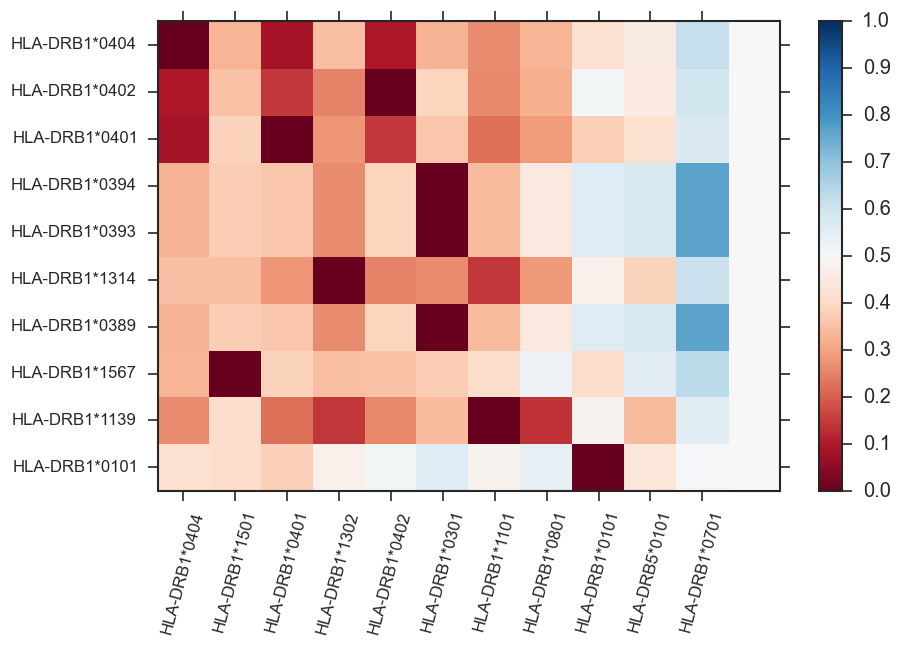

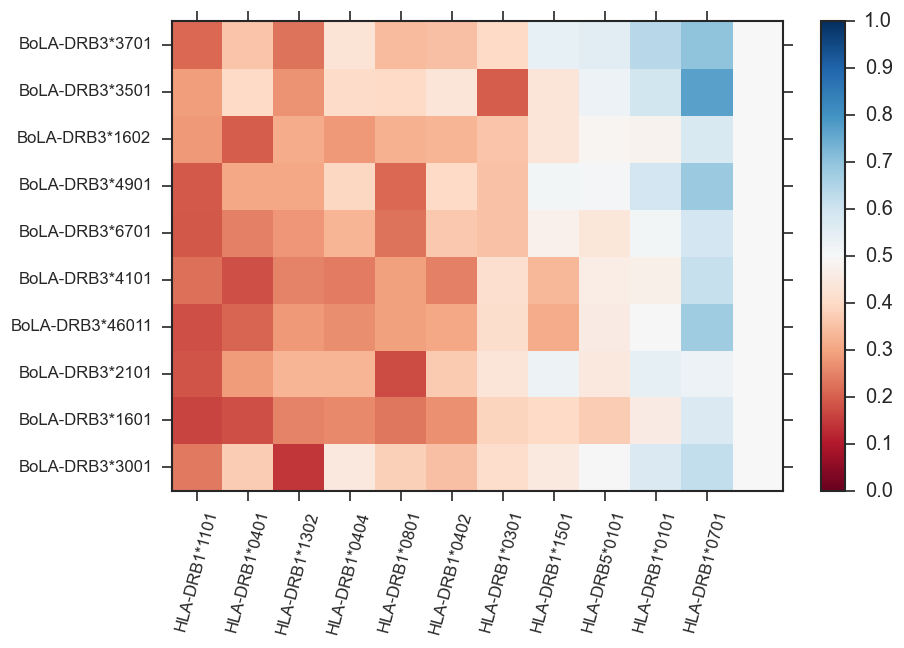

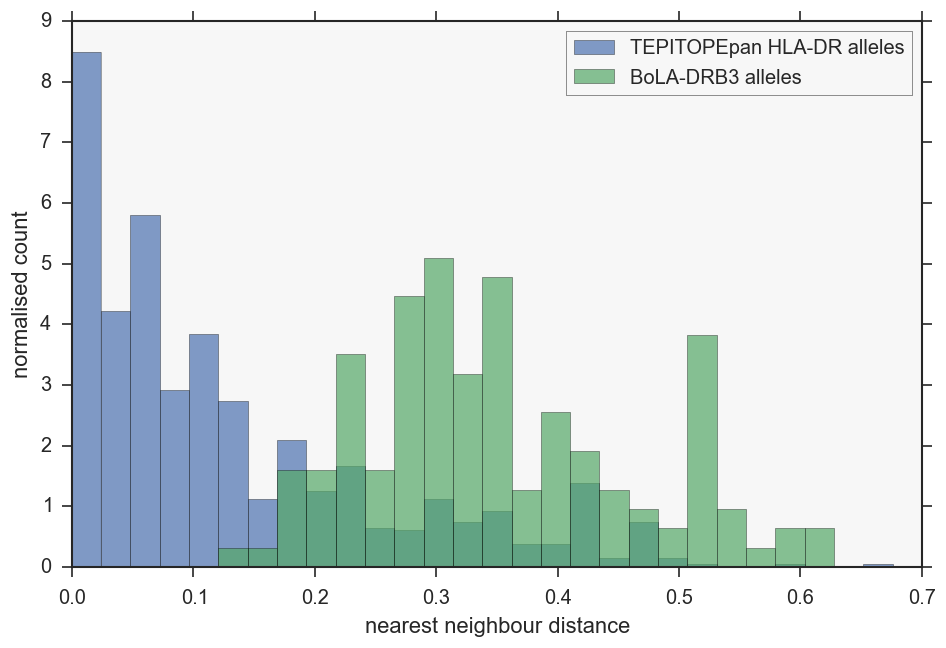

In [132]:
reload(Tepitope)
d=Tepitope.datadir
boladrb = os.path.join(d,'IPD_MHC/bola.drb3.fa')
hladrb = os.path.join(d,'IPD_MHC/hla.drb345.fa')
ref = os.path.join(d,'IPD_MHC/hlaref.fa')
aln = Tepitope.drbaln
alnindex = dict([(a.id,a) for a in aln])
Tepitope.compareRef(hladrb,boladrb,ref,alnindex)


ref
HLA-DRB3*0201    0.158295
nearest          0.160000
HLA-DRB1*1101    0.162258
HLA-DRB1*0801    0.172932
HLA-DRB1*1301    0.173228
HLA-DRB1*0401    0.176024
HLA-DRB1*1401    0.182514
HLA-DRB1*0301    0.198380
HLA-DRB3*0101    0.212574
HLA-DRB1*1601    0.252501
dtype: float64


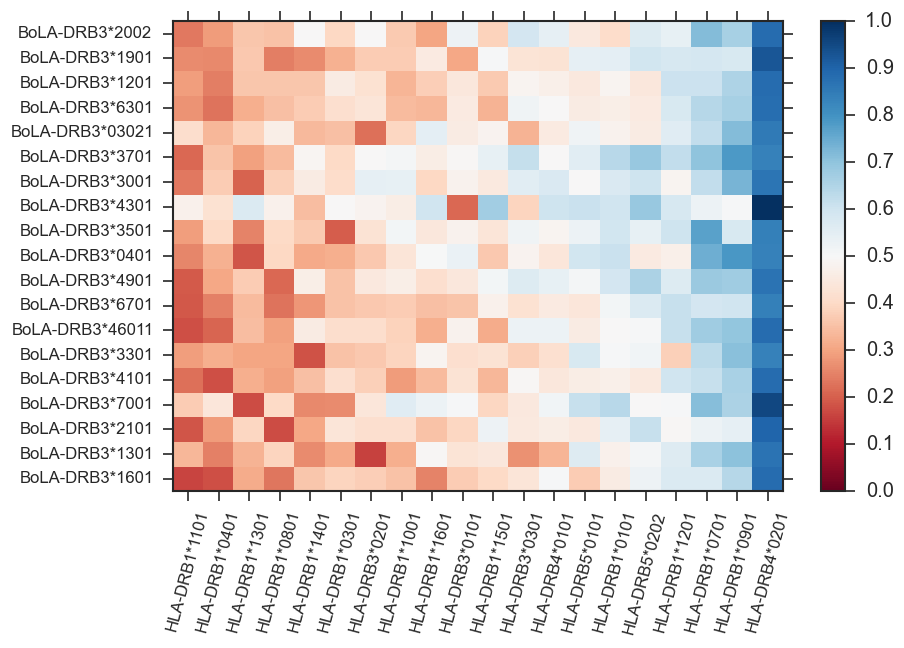

In [133]:
reload(Tepitope)
a = Tepitope.compare(hladrb, boladrb, alnindex)
hlas = a.min()
hlas.sort()
print hlas[:10]

In [ ]:
#vla negatives
gp = pd.read_csv('gareth_negatives.csv')
#how to find epitope ranking in our binders?
#print b1[:10]
#print neg[:2]

def findinGenome(genome, peptide):
    t = genome[genome.translation.str.contains(peptide)]
    if len(t)>0:
        return t.head(1).squeeze().locus_tag
    else:
        return ''
    
gp['locus_tag'] = gp.apply( lambda x: findinGenome(genome, x.sequence), 1)
print gp[:10]

In [44]:
def hasseq(r, seqs):    
    for s in seqs:
        if s in r.sequence:
            return 1
    return 0

x = b4[b4.name.isin(gp.locus_tag)]
#need to reduce similarity of gareth peptides

gp['pred_binder'] = gp.apply(lambda r: hasseq(r, x.core),1)
print gp[gp['pred_binder']==1]

In [539]:
#epitope conservation analysis

sys.path.append(os.path.join(home,'gitprojects'))
reload(analysis)
db = os.path.join(home,'myco_genomes/all_genomes') #local blastdb
#res = vlares
#res=res.dropna(subset=['peptide'])
res = top #res[res.score>50]
#print res[res.locus_tag=='Rv3676']

cons=[]
for i,r in list(res.iterrows()): #[:25]:
    #print i, r.peptide, r.locus_tag
    tag = r.locus_tag
    p = genome[genome['locus_tag']==tag]
    seq = p.translation.head(1).squeeze()
    #blast local db
    recs = analysis.getLocalOrthologs(seq,db)
    recs['accession'] = recs.apply(lambda x: x.subj.split('|')[2].split()[1],1)
    recs = recs[recs.perc_ident>50]    
    
    #which part of peptide to use??
    pep = r.peptide[2:17]
    c = analysis.findConservedPeptide(pep,recs)   
    
    c = c.reset_index()
    #print    
    c['species'] = c.accession.apply(lambda x : re.split("\d+", x)[0][:3])
    c['name'] = r.peptide
    c = c.drop_duplicates('species')
    #print c
    cons.append(c)

df = pd.concat(cons)
df = df.dropna()
s = df.set_index(['name','species'])
s = s.drop('accession',1)

s = s.unstack(level=-1)
s=s.clip(upper=1)
s=s.fillna(0)
s.columns = s.columns.get_level_values(1)
s = s.merge(res[['peptide','locus_tag']], left_index=True, right_on='peptide')

s.to_csv('peptide_conservation.csv')
print len(s)

42
42


locus_tag  peptide             
Rv2150c    FIAINTDAQALLMSDADVKL    9
Rv2605c    DPVLHICALAYMSDLTLLGS    8
Rv1240     AAGQIGYSLLFRLASGSLLG    7
Rv2987c    ALMDYGFRVVISSRFGDIFR    7
Rv0757     PTEFTLLRYFVINAGTVLSK    6
dtype: float64


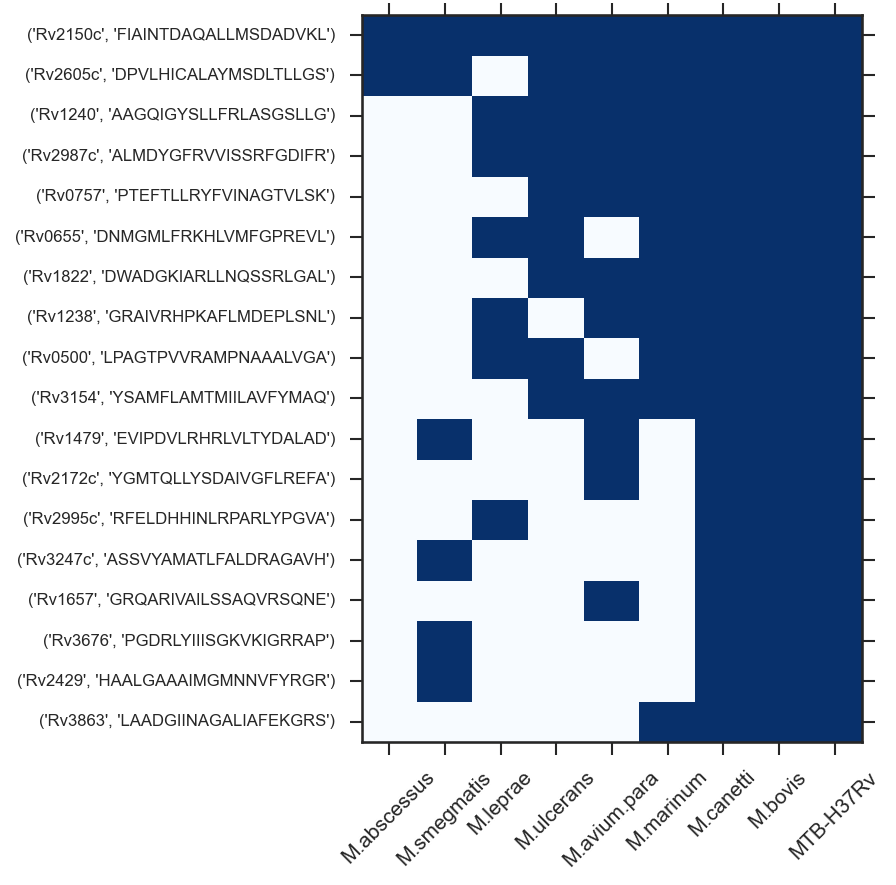

In [544]:
s = pd.read_csv('peptide_conservation.csv',index_col=0)
#replace col names with species
spnames = {'MAB':'M.abscessus','MAF':'M.africanum','MAP':'M.avium.para','ML':'M.leprae','MMA':'M.marinum',
           'Rv':'MTB-H37Rv','MUL':'M.ulcerans','BN':'M.canetti','Mb':'M.bovis','MSM':'M.smegmatis'}
species = spnames.values()
s=s.rename(columns=spnames)
#sort by counts on both axes
s=s.set_index(['locus_tag','peptide'])#,'peptide'])
s=s.reindex_axis(s.sum().order().index, axis=1)
s=s.reindex_axis(s.sum(1).order().index)

#s=s.sortlevel()
totals = s.sum(1).order(ascending=False)
print totals[:5]
#print top[top.locus_tag.isin(totals[:15].index.get_level_values(0))]
#print totals.value_counts()

fig,ax = plt.subplots(1,1,figsize=(6,6))
s=s[s.sum(1)>3]
analysis.plotheatmap(s,ax)
plt.savefig('peptide_conservation_map.png')

#plt.plot(s['#pos'],s.sum(1),'o')

In [725]:
#homology of 20mers within m.bovis?
reload(analysis)
db = os.path.join(home,'myco_genomes/mbovis') #local blastdb
x = res[res['#wbpos']>=50].dropna(subset=['pep_no'])

cons=[]
for i,r in list(x.iterrows()):
    #print i, r.peptide, r.locus_tag
    tag = r.locus_tag
    seq = r.peptide
    #blast local db
    recs = analysis.getLocalOrthologs(seq,db)
    if len(recs)>1:
        print tag, r['product']
        print recs
    

Rv1886c nan
                                                subj  score        expect  identity  positive  query_length  \
0  gnl|BL_ORD_ID|1899 Mb1918c secreted antigen 85...    109  4.714390e-09        20        20            20   
1  gnl|BL_ORD_ID|3800 Mb3834c SECRETED ANTIGEN 85...     92  8.277590e-07        16        19            20   

               sequence  perc_ident  
0  AEFLENFVRSSNLKFQDAYN         100  
1  AKFLEGFVRTSNIKFQDAYN          80  
Rv1238 Probable sugar-transport ATP-binding protein ABC transporter SugC
                                                subj  score        expect  identity  positive  query_length  \
0  gnl|BL_ORD_ID|1253 Mb1270 PROBABLE SUGAR-TRANS...    107  1.006190e-08        20        20            20   
1  gnl|BL_ORD_ID|2043 Mb2064c Probable sugar-tran...     90  1.831730e-06        17        18            20   
2  gnl|BL_ORD_ID|2830 Mb2856c PROBABLE Sn-GLYCERO...     83  1.403850e-05        16        17            20   

               sequenc